Reference: <누구나 파이썬 통계분석>, 타니아이 히로키

## 1. 데이터
###  - 데이터의 크기
###  - 변수의 종류

#### 1. 데이터의 크기
* 데이터의 크기 -> df.shape = (a,b)
* 여기서 a는 데이터의 크기, b는 변수의 수

#### 2. 변수의 종류
* 질적 변수와 양적 변수
  - 질적 변수: 선택이 필요한 변수 (설문조사, 혈액형 등)
  - 양적 변수: 양을 표현하는 변수 (시험점수, 신장 등)
* 척도 수준
  - 질적 변수: 명의 척도, 순서 척도
    + 명의 척도: 단순히 분류하기 위한 변수 (학생번호, 전화번호, 성별 등)
    + 순서 척도: 순서 관계나 대소 관계에 의미 有
  - 양적 변수: 간격 척도, 비례 척도
    + 간격 척도: 대소 관계와 함께 그 차이에도 의미를 두는 변수 (온도, 연도 등)
    + 비례 척도: 대소 관계, 차이, 비 모두에 의미가 있는 변수 (길이, 무게 등)
    + 간격 척도와 비례 척도를 구별하기 힘듦 => '0' = '없음' 인지 확인하면 됨 (ex. 길이 0 = 없음 / 온도 0 = 없음x)
* 이산형 변수와 연속형 변수
  - 이산형 변수: 0,1,2... 처럼 하나하나의 값을 취하는 변수, 서로 인접한 숫자 사이 값x (결석 횟수, 학생 수 등)
  - 연속형 변수: 연속적인 값을 취할 수 있는 변수 (길이, 무게, 시간 등)
* 변수의 분류는 변수의 성질을 파악하는 지식에 의존 => 분석가의 판단 필요

## 2. 1차원 데이터 정리
### - 데이터 중심의 지표
### - 데이터의 산포도 지표
### - 데이터의 정규화
### - 1차원 데이터의 시각화

#### 1. 데이터 중심의 지표
* 통계분석의 첫걸음 = 데이터를 정리하여 데이터의 특징을 대략적으로 파악하는 것
* 데이터의 특징을 파악하는 방법
  - 평균이나 분산 등의 수치 지표에 따라 데이터를 요약
  - 그림을 그려 시각적으로 데이터를 조감

In [1]:
import numpy as np
import pandas as pd
# 주피터 노트북 출력을 소수점 이하 3자리로 제한
%precision 3
# 데이터프레임 출력을 소수저 이하 3자리로 제한
pd.set_option('precision', 3)

In [2]:
df = pd.read_csv('ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [3]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [4]:
scores_df = pd.DataFrame({'score' : scores},
                         index = pd.Index(['A','B','C','D','E',
                                          'F','G','H','I','J'],
                                         name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


#### 1. 데이터 중심의 지표
* 대푯값: 데이터를 하나의 값으로 요약한 지표
  - 평균값
  - 중앙값: 데이터를 크기 순서대로 나열할 때 정확하게 중앙에 위치한 값
    + 중앙값은 평균값에 비해 이상값의 영향을 덜 받음 => 데이터에 큰 이상값이 있는 경우, 대푯값으로 중앙값이 더 적합
    + 데이터의 개수가 짝수라면 중앙에 위치한 두 값의 평균으로 구함
  - 최빈값: 데이터에서 가장 많이 나타나는 값
    + 주로 질적 데이터의 대푯값을 구할 때 사용하는 지표

In [5]:
# 평균값1
sum(scores) / len(scores)
# 평균값2
np.mean(scores)
# 평균값3
scores_df.mean()

score    55.0
dtype: float64

In [6]:
# 중앙값1
sorted_scores = np.sort(scores)
sorted_scores

# 데이터 개수가 홀,짝일 경우를 나눠서 구하기
n = len(sorted_scores)
if n%2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 +m1) / 2
else:
    median = sorted_scores[(n+1)//2]
median
# 중앙값2
np.median(scores)
# 중앙값3
scores_df.median()

score    56.5
dtype: float64

In [7]:
# 최빈깂
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

#### 2. 데이터의 산포도 지표
'''
학급 전원이 50점을 받은 시험이 있고, 학급에서 절반은 0점을 받았지만 나머지 절반은 100점을 받은 시험이 있음.
결과는 완전히 다르지만 두 경우 모두 평균값과 중앙값은 동일하게 50점이 되어버림.
전자는 개개인의 점수가 모여 있고, 후자는 개개인의 점수가 심하게 흩어져 있는 이미지가 떠올려짐...
'''
* 분산과 표준편차
  - 편차: 각 데이터가 평균으로부터 어느 정도 떨어져 있는가를 나타내는 지표
    + (Numpy의 브로드캐스트 -> 배열과 하나의 숫자와의 조합으로 이루어진 산술 연산을 수행 -> 숫자 하나와 배열의 원소별 계산이 각각 한 번씩 수행됨)
    + 편차 평균은 항상 0
  - 분산: 편차의 제곱 (편차의 방향이 상관 없어짐)
    + 편차의 절댓값 평균도 쓰일 수 있지만 제곱 평균에 비해 다루기 어렵기 때문에 그다지 사용되지 않음
    + 분산 = 면적의 평균이라는 이미지로 바라보는 시각도 존재
      * 편차 제곱은 한 변의 길이가 편차인 정사각형의 면적으로 생각할 수 있기 때문
      * 이러한 접근 방식은 공분산 이해에 도움 됨
  - 표준편차: 분산의 제곱근
    + 원래의 데이터와 동일한 단위를 쓰므로 동일한 차원으로 그릴 수 있음
* 범위와 사분위 범위
  - 범위: 데이터 전체를 보는 것이 아니라 데이터의 최댓값과 최솟값만으로 산포도를 표현하는 방법
    + 최댓값과 최솟값의 차이가 크면 산포도가 크고, 그 차이가 작으면 산포도도 작음
    + 이상값에 약함
  - 사분위 범위: 데이터의 하위 25%, 50%, 75%에 위치하는 값에 주목함 (각각 제1사분위수(Q1), 제2사분위수(Q2), 제3사분위수(Q3))
    + Q3 -Q1 = IQR
    + Q2 = 중앙값

In [8]:
# 편차
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [9]:
another_scores = [50,60,58,54,51,56,57,52,53,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -3., -2.,  4.])

In [10]:
# 정리1
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [11]:
# 분산
np.mean(deviation**2)
np.var(scores)

86.0

In [12]:
scores_df.var() # 값이 위와 다르다

score    95.556
dtype: float64

* 넘파이와 데이터프레임에서의 계산값이 다른 이유
  - Numpy는 표본분산, Pandas는 불편분산을 활용
  - Pandas에서 표본분산 사용법: 'ddof=0' 인수 설정 (Numpy에서도 마찬가지)

In [13]:
# 표준편차
np.sqrt(np.var(scores, ddof=0))
np.std(scores, ddof=0)

9.273618495495704

In [14]:
# 정리2
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [15]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [16]:
# 범위
np.max(scores) - np.min(scores)

28

In [17]:
# 사분위 범위
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [18]:
# 지금까지 다룬 지표를 한 번에 구하기
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

#### 3. 데이터의 정규화
* 정규화: 데이터를 통일된 지표로 변환하는 것
* 표준화: 데이터에서 평균을 빼고 표준편차로 나누는 작업
  - 표준화된 데이터 = 표준화 변량(standardized data) or Z점수(z-score)
  - 표준화된 데이터의 평균은 0, 표준편차는 1
  - 표준화된 데이터는 원래 데이터와 같은 단위를 쓰지 않음 (데이터와 동일한 단위를 쓰는 표준편차로 나눴기 때문)
* 편찻값: 평균이 50, 표준편차가 10이 되도록 정규화한 값

In [19]:
# 표준화
z = ((scores - np.mean(scores)) / np.std(scores))
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [20]:
np.mean(z), np.std(z,ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

In [21]:
# 편찻값
z = 50 + 10*(scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [22]:
scores_df['deviation value'] = z
scores_df # 편찻값을 통해 어떤 학생이 평균적인 성적을 얻었고 어떤 학생이 어떤 학생이 우수한 성적을 얻었는지 파악 가능

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


#### 4. 1차원 데이터의 시각화
* 도수분포표(frequency distribution): 데이터가 취하는 값을 몇 개의 구간으로 나누고, 각 구간에 몇 개의 데이터가 들어가는가를 세는 방법
  - 계급(class): 구간
  - 도수(frequency): 각 계급에 속한 데이터 수
  - 계급폭: 각 구간의 폭
  - 계급수: 계급의 수
  - 계급값: 계급을 대표하는 값 = 계급의 중앙값
  - 상대도수: 전체 데이터에 대해 해당 계급의 데이터가 어느 정도의 비율을 차지하고 있는지를 나타냄
  - 누적상대도수: 해당 계급까지의 상대도수의 합을 나타냄
* 히스토그램(histogram): 도수분포표를 막대그래프로 나타낸 것
  - 계급수에 따라 모양이 크게 변하기 때문에 데이터에 따라 적절한 값 설정이 중요
* 상자그림(box plot): 분위수 사용

In [23]:
# 50명의 영어 점수 array
english_scores = np.array(df['english'])
# Series로 변환하여 describe 표시
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

In [24]:
# 0점부터 100점까지의 점수를 계급수 10으로 분류
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [25]:
# 0-10,10-20... 문자열 작성
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]
# 데이터프레임 작성
freq_dist_df = pd.DataFrame({'frequency': freq},
                           index=pd.Index(freq_class,
                                         name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [26]:
# 계급값
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [27]:
# 상대도수
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [28]:
# 누적상대도수
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [29]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value','frequency',
                             'relative frequency','cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [30]:
# 히스토그램
import matplotlib.pyplot as plt
# 그래프가 주피터 노트북 위에 표시
%matplotlib inline 

<function matplotlib.pyplot.show(close=None, block=None)>

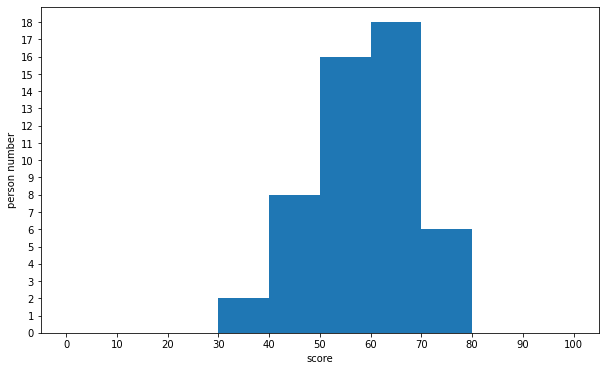

In [31]:
fig = plt.figure(figsize=(10,6))
# 인수는 영역을 1X1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
# X축을 0,10,20...,100 눈금으로 구분
ax.set_xticks(np.linspace(0,100,10+1))
# Y축을 0,1,2,3,...의 눈금으로 구분
ax.set_yticks(np.arange(0,freq.max()+1))

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

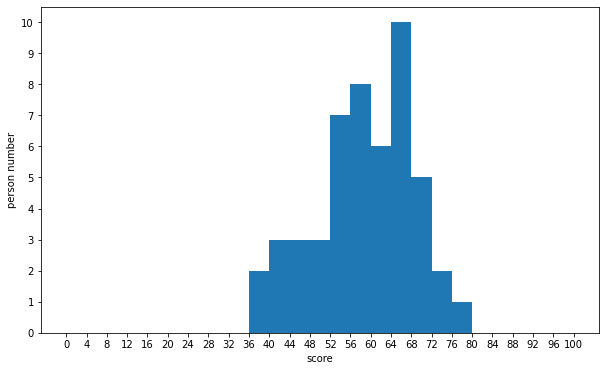

In [32]:
# 계급수 늘리기
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

freq, _, _ = ax.hist(english_scores, bins=25, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(0,freq.max()+1))

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

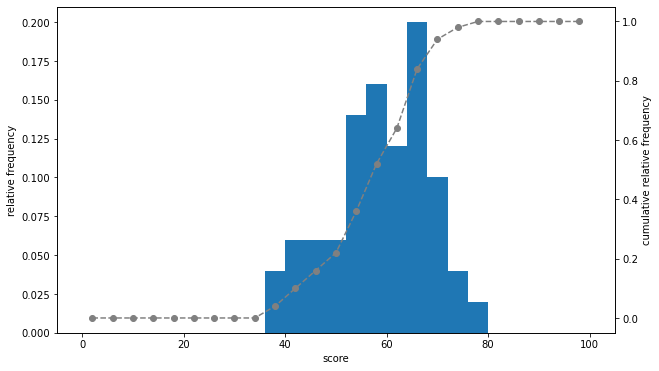

In [33]:
# 상대도수의 히스토그램에 누적상대도수의 꺾은선 그래프 추가
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
# Y축에 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

# 상대도수의 히스토그램으로 하기 위해 도수를 데이터의 수로 나눠야함
# hist의 인수 weight를 통해 실현
weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25, range=(0,100),
                         weights=weights)
cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

# 꺾은선 그래프 그리기
# ls = linestyle
ax2.plot(class_value, cum_rel_freq,
        ls='--', marker='o', color='gray')
# 꺾은선 그래프의 눈금선 제거
ax2.grid(False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax.set_xticks(np.linspace(0,100,25+1))

plt.show

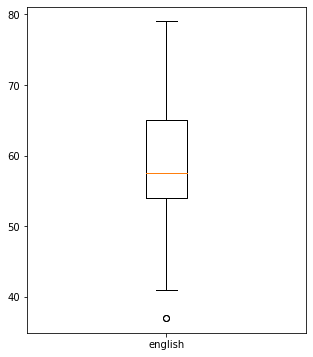

In [34]:
# 상자그림
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])
plt.show()